<a href="https://colab.research.google.com/github/A1171/ColabNotebooks/blob/main/AEC_Pasport_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Шрифты calibri.ttf timesnewromanpsmt.ttf  надо подгрузить в колаб.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

def GenerateImage():
  #вероятность букв при генерации не сделал
  #а — 8.66% б — 1.51% в — 4.19% г — 1.41% д — 2.56% е — 8.10% ё — 1% ж — 0.78% з — 1.81% и — 7.45% й — 1.31% к — 3.47% л — 4.32% м — 3.29% н — 6.35% о — 9.28% п — 3.35% р — 5.53% с — 5.45% т — 6.30% у — 2.90% ф — 0.40% х — 0.92% ц — 0.52% ч — 1.27% ш — 0.77% щ — 0.49% ъ — 0.04% ы — 2.11% ь — 1.90% э — 0.17% ю — 1.03% я — 2.22%
  #8.66,1.51,4.19,1.41,2.56,8.10,1,0.78,1.81% и — 7.45% й — 1.31% к — 3.47% л — 4.32% м — 3.29% н — 6.35% о — 9.28% п — 3.35% р — 5.53% с — 5.45% т — 6.30% у — 2.90% ф — 0.40% х — 0.92% ц — 0.52% ч — 1.27% ш — 0.77% щ — 0.49% ъ — 0.04% ы — 2.11% ь — 1.90% э — 0.17% ю — 1.03% я — 2.22%
  ImageShape=(64,528)
  TextColorAdd=np.random.randint(50,150)
  BackColor=np.random.randint(10,100)
  ImgArr=np.ones(ImageShape,dtype=np.int8)
  ImgArr=ImgArr*BackColor
  Img=Image.fromarray(ImgArr)
  draw = ImageDraw.Draw(Img)
  FontNum=np.random.randint(0,1)
  if(FontNum==0):
    font1 = ImageFont.truetype("calibri.ttf", 40)
  else:
    font1 = ImageFont.truetype("timesnewromanpsmt.ttf", 40)
  SymbolList1="АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдеёжзийклмнопрстуфхцчшщъыьэюя.-    "
  SymbolList1=list(SymbolList1)
  SymbolList2="1234567890-"
  LenText=np.random.randint(3,24)
  Indexes=np.random.randint(0,len(SymbolList1),LenText)
  ShiftX=np.random.randint(-5,30)
  Shifty=np.random.randint(-8,5)
  #print(SymbolList1)
  text1=[SymbolList1[index1] for index1 in Indexes]
  text2=""
  for smb in text1:
    text2+=smb
  #Text=SymbolList1[Indexes]
  draw.text((10+ShiftX, 12+Shifty),text2,(BackColor+TextColorAdd),font=font1)
  return Img

DatasetGen=[]
for i in range(5000):
  Img=np.array(GenerateImage())/255.0
  #print(Img.shape)
  DatasetGen.append(Img.copy())
DatasetGen=np.array(DatasetGen)

# draw.text((x, y),"Sample Text",(r,g,b))
#Img.save('sample-out.jpg')
#plt.imshow(Img)
#ImageDraw.Draw(draw).text((0, 0),'Hello world!',(0, 0, 0))

In [ ]:
def ChangeSize(im):
  NewHeight=64
  MaxWidth=528
  width, height = im.size
  im=im.resize((int(width*NewHeight/height), NewHeight))
  ImArr=np.array(im)
  FillColor=ImArr[2,2]
  AppendPoints=MaxWidth-ImArr.shape[1]
  if(AppendPoints>0):
      ImArr=np.hstack((ImArr,np.ones((ImArr.shape[0],AppendPoints),dtype=type(ImArr[0,0]))*FillColor))
  return ImArr

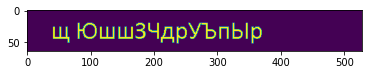

In [ ]:
plt.imshow(DatasetGen[0])

In [ ]:
from keras import regularizers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model

In [ ]:
#AEC test for removing noise
def create_base_ae2(in_shape,Filters,ConvActivation="tanh",l2Conv=0.0005,l2ConvB=0.0):
    # Энкодер, вход нейросети
    inputs1 = layers.Input(in_shape)

    # Энкодер, первый блок
    x = layers.Conv2D(Filters,3, padding='same', activation=ConvActivation,kernel_regularizer=regularizers.l2(l2Conv),bias_regularizer=regularizers.l2(l2ConvB))(inputs1)
    #print(np.shape(x))
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)#16
    # Энкодер, второй блок
    x = layers.Conv2D(Filters*2,3, padding='same', activation=ConvActivation,kernel_regularizer=regularizers.l2(l2Conv),bias_regularizer=regularizers.l2(l2ConvB))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)#8
    x = layers.Conv2D(Filters*4,3, padding='same', activation=ConvActivation,kernel_regularizer=regularizers.l2(l2Conv),bias_regularizer=regularizers.l2(l2ConvB))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)#8
    # Энкодер, 3 блок
    x = layers.Conv2D(1,1, padding='same', activation=ConvActivation,kernel_regularizer=regularizers.l2(l2Conv),bias_regularizer=regularizers.l2(l2ConvB))(x)
    shape=x.shape[1:]

    z=layers.Flatten()(x)
    len=z.shape[1]
    #z=layers.Dense(400)(z)
    z=layers.Dense(len)(z)
    z=layers.Reshape(shape)(z)

    
    
    

    # Декодер, первый блок
    # Декодер, 3 блок
    x = layers.Conv2DTranspose(Filters*4, 3, strides=2, padding='same', activation=ConvActivation,kernel_regularizer=regularizers.l2(l2Conv),bias_regularizer=regularizers.l2(l2ConvB))(z)
    x = layers.Conv2D(Filters*4, 3, padding='same', activation=ConvActivation,kernel_regularizer=regularizers.l2(l2Conv),bias_regularizer=regularizers.l2(l2ConvB))(x)
    x = layers.BatchNormalization()(x) 
    # Декодер, 3 блок
    x = layers.Conv2DTranspose(Filters*2, 3, strides=2, padding='same', activation=ConvActivation,kernel_regularizer=regularizers.l2(l2Conv),bias_regularizer=regularizers.l2(l2ConvB))(x)
    x = layers.Conv2D(Filters*2, 3, padding='same', activation=ConvActivation,kernel_regularizer=regularizers.l2(l2Conv),bias_regularizer=regularizers.l2(l2ConvB))(x)
    x = layers.BatchNormalization()(x) 
    # Декодер, 4 блок
    x = layers.Conv2DTranspose(Filters, 3, strides=2, padding='same', activation=ConvActivation,kernel_regularizer=regularizers.l2(l2Conv),bias_regularizer=regularizers.l2(l2ConvB))(x)
    x = layers.Conv2D(Filters, 3, padding='same', activation=ConvActivation,kernel_regularizer=regularizers.l2(l2Conv),bias_regularizer=regularizers.l2(l2ConvB))(x)
    x = layers.BatchNormalization()(x) 
    outputs = layers.Conv2D(in_shape[-1], 3, activation='linear', padding='same')(x)#'sigmoid'
    model_Seq2Seq = keras.Model(inputs=inputs1, outputs=outputs) 
    return model_Seq2Seq


AEC_Model=create_base_ae2(DatasetGen[0][...,np.newaxis].shape,32,ConvActivation="relu",l2Conv=0.0005,l2ConvB=0.0)
AEC_Model.summary()
AEC_Model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003), loss='mse') 
history3=AEC_Model.fit(DatasetGen[...,np.newaxis],DatasetGen[...,np.newaxis],epochs=15,batch_size=32,verbose=2)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 528, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 64, 528, 32)       320       
                                                                 
 batch_normalization (BatchN  (None, 64, 528, 32)      128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 264, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 264, 64)       18496     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 264, 64)      256   

In [ ]:
AEC_Model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse') 
history3=AEC_Model.fit(DatasetGen[...,np.newaxis],DatasetGen[...,np.newaxis],epochs=10,batch_size=128,verbose=2)

Epoch 1/10
40/40 - 35s - loss: 0.0092 - 35s/epoch - 874ms/step
Epoch 2/10
40/40 - 23s - loss: 0.0083 - 23s/epoch - 584ms/step
Epoch 3/10
40/40 - 23s - loss: 0.0083 - 23s/epoch - 577ms/step
Epoch 4/10
40/40 - 23s - loss: 0.0082 - 23s/epoch - 581ms/step
Epoch 5/10
40/40 - 23s - loss: 0.0083 - 23s/epoch - 583ms/step
Epoch 6/10
40/40 - 23s - loss: 0.0082 - 23s/epoch - 579ms/step
Epoch 7/10
40/40 - 23s - loss: 0.0081 - 23s/epoch - 578ms/step
Epoch 8/10
40/40 - 23s - loss: 0.0082 - 23s/epoch - 577ms/step
Epoch 9/10
40/40 - 23s - loss: 0.0079 - 23s/epoch - 581ms/step
Epoch 10/10
40/40 - 23s - loss: 0.0080 - 23s/epoch - 580ms/step


In [ ]:
PicAndResultFileDir='drive/MyDrive/NN/Pasport/'
AEC_Model.save(PicAndResultFileDir+"PSPAEC_2528_2.h5")

Результат обучающая тестовая

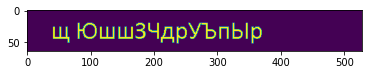

1/1 [==============================] - 1s 601ms/step


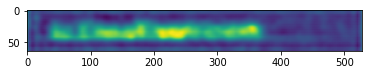

In [ ]:
plt.imshow(DatasetGen[0])
plt.show()
plt.imshow(AEC_Model.predict(DatasetGen[0][np.newaxis,:,:,np.newaxis])[0,:,:,0])
plt.show()

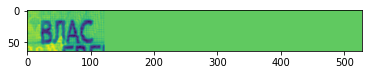

1/1 [==============================] - 0s 205ms/step


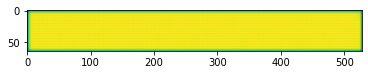

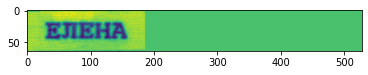

1/1 [==============================] - 0s 21ms/step


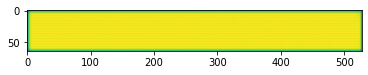

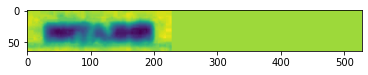

1/1 [==============================] - 0s 22ms/step


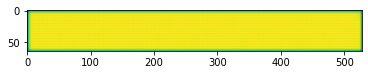

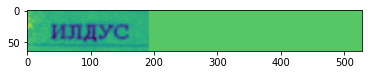

1/1 [==============================] - 0s 22ms/step


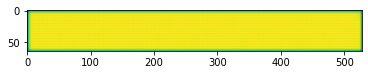

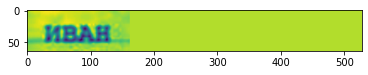

1/1 [==============================] - 0s 20ms/step


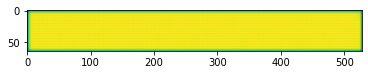

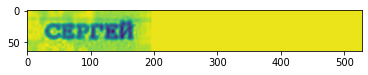

1/1 [==============================] - 0s 30ms/step


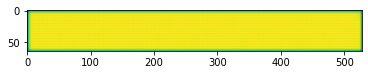

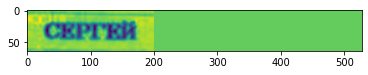

1/1 [==============================] - 0s 23ms/step


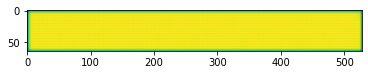

FileNotFoundError: ignored

In [ ]:
from PIL import Image
for i in range(15):
  image=Image.open("Pics/first_name"+str(i)+".jpeg")
  pic2=ChangeSize(image)
  plt.imshow(np.array(pic2))
  plt.show()
  prd=AEC_Model.predict(pic2[np.newaxis,:,:,np.newaxis])
  plt.imshow(prd[0,:,:,0])
  plt.show()

Меньше сверток и нет спрямления

In [ ]:
#AEC test for removing noise
def create_base_ae2(in_shape,Filters,ConvActivation="tanh",l2Conv=0.0005,l2ConvB=0.0):
    # Энкодер, вход нейросети
    inputs1 = layers.Input(in_shape)

    # Энкодер, первый блок
    x = layers.Conv2D(Filters,3, padding='same', activation=ConvActivation,kernel_regularizer=regularizers.l2(l2Conv),bias_regularizer=regularizers.l2(l2ConvB))(inputs1)
    #print(np.shape(x))
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)#16
    # Энкодер, второй блок
    x = layers.Conv2D(Filters*2,3, padding='same', activation=ConvActivation,kernel_regularizer=regularizers.l2(l2Conv),bias_regularizer=regularizers.l2(l2ConvB))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)#8
    """
    x = layers.Conv2D(Filters*4,3, padding='same', activation=ConvActivation,kernel_regularizer=regularizers.l2(l2Conv),bias_regularizer=regularizers.l2(l2ConvB))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)#8
    """
    # Энкодер, 3 блок
    z = layers.Conv2D(1,1, padding='same', activation=ConvActivation,kernel_regularizer=regularizers.l2(l2Conv),bias_regularizer=regularizers.l2(l2ConvB))(x)
    

    
    
    

    # Декодер, первый блок
    # Декодер, 3 блок
    """
    x = layers.Conv2DTranspose(Filters*4, 3, strides=2, padding='same', activation=ConvActivation,kernel_regularizer=regularizers.l2(l2Conv),bias_regularizer=regularizers.l2(l2ConvB))(z)
    x = layers.Conv2D(Filters*4, 3, padding='same', activation=ConvActivation,kernel_regularizer=regularizers.l2(l2Conv),bias_regularizer=regularizers.l2(l2ConvB))(x)
    x = layers.BatchNormalization()(x) 
    """
    # Декодер, 3 блок
    x = layers.Conv2DTranspose(Filters*2, 3, strides=2, padding='same', activation=ConvActivation,kernel_regularizer=regularizers.l2(l2Conv),bias_regularizer=regularizers.l2(l2ConvB))(x)
    x = layers.Conv2D(Filters*2, 3, padding='same', activation=ConvActivation,kernel_regularizer=regularizers.l2(l2Conv),bias_regularizer=regularizers.l2(l2ConvB))(x)
    x = layers.BatchNormalization()(x) 
    # Декодер, 4 блок
    x = layers.Conv2DTranspose(Filters, 3, strides=2, padding='same', activation=ConvActivation,kernel_regularizer=regularizers.l2(l2Conv),bias_regularizer=regularizers.l2(l2ConvB))(x)
    x = layers.Conv2D(Filters, 3, padding='same', activation=ConvActivation,kernel_regularizer=regularizers.l2(l2Conv),bias_regularizer=regularizers.l2(l2ConvB))(x)
    x = layers.BatchNormalization()(x) 
    outputs = layers.Conv2D(in_shape[-1], 3, activation='linear', padding='same')(x)#'sigmoid'
    model_Seq2Seq = keras.Model(inputs=inputs1, outputs=outputs) 
    return model_Seq2Seq


AEC_Model=create_base_ae2(DatasetGen[0][...,np.newaxis].shape,32,ConvActivation="relu",l2Conv=0.0005,l2ConvB=0.0)
AEC_Model.summary()

import gc
AEC_Model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003), loss='mse') 
history3=AEC_Model.fit(DatasetGen[...,np.newaxis],DatasetGen[...,np.newaxis],epochs=150,batch_size=32,verbose=2)
gc.collect()
AEC_Model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), loss='mse') 
history3=AEC_Model.fit(DatasetGen[...,np.newaxis],DatasetGen[...,np.newaxis],epochs=50,batch_size=128,verbose=2)
gc.collect()
AEC_Model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse') 
history3=AEC_Model.fit(DatasetGen[...,np.newaxis],DatasetGen[...,np.newaxis],epochs=100,batch_size=1000,verbose=2)
gc.collect()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 528, 1)]      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 528, 32)       320       
                                                                 
 batch_normalization_4 (Batc  (None, 64, 528, 32)      128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 264, 32)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 264, 64)       18496     
                                                                 
 batch_normalization_5 (Batc  (None, 32, 264, 64)      256 

KeyboardInterrupt: ignored

In [ ]:
AEC_Model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse') 
history3=AEC_Model.fit(DatasetGen[...,np.newaxis],DatasetGen[...,np.newaxis],epochs=20,batch_size=128,verbose=2)

Epoch 1/20
40/40 - 22s - loss: 0.0043 - 22s/epoch - 556ms/step
Epoch 2/20
40/40 - 19s - loss: 0.0017 - 19s/epoch - 487ms/step
Epoch 3/20
40/40 - 19s - loss: 0.0013 - 19s/epoch - 480ms/step
Epoch 4/20
40/40 - 19s - loss: 0.0010 - 19s/epoch - 476ms/step
Epoch 5/20
40/40 - 19s - loss: 9.4908e-04 - 19s/epoch - 477ms/step
Epoch 6/20
40/40 - 19s - loss: 8.3018e-04 - 19s/epoch - 479ms/step
Epoch 7/20
40/40 - 19s - loss: 7.9984e-04 - 19s/epoch - 479ms/step
Epoch 8/20
40/40 - 19s - loss: 8.5452e-04 - 19s/epoch - 477ms/step
Epoch 9/20


KeyboardInterrupt: ignored

In [ ]:
PicAndResultFileDir='drive/MyDrive/NN/Pasport/'
AEC_Model.save(PicAndResultFileDir+"PSPAEC_528.h5")

In [ ]:
PicAndResultFileDir='drive/MyDrive/NN/Pasport/'
AEC_Model=load_model(PicAndResultFileDir+"PSPAEC_528.h5")

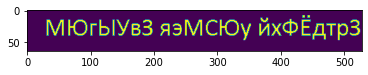

1/1 [==============================] - 0s 126ms/step


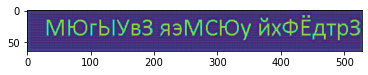

In [ ]:
plt.imshow(DatasetGen[0])
plt.show()
plt.imshow(AEC_Model.predict(DatasetGen[0][np.newaxis,:,:,np.newaxis])[0,:,:,0])
plt.show()

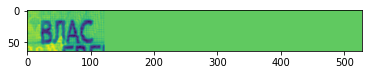

1/1 [==============================] - 0s 22ms/step


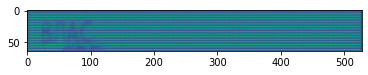

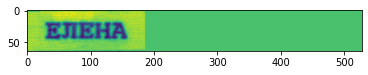

1/1 [==============================] - 0s 21ms/step


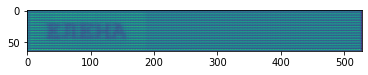

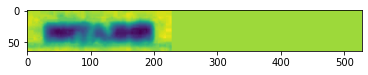

1/1 [==============================] - 0s 18ms/step


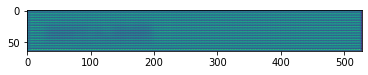

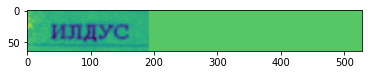

1/1 [==============================] - 0s 21ms/step


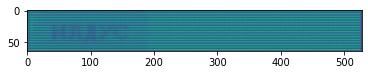

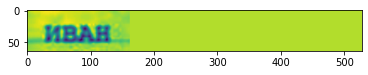

1/1 [==============================] - 0s 20ms/step


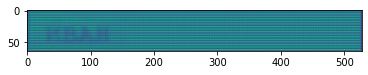

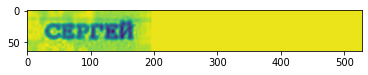

1/1 [==============================] - 0s 19ms/step


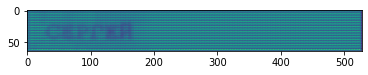

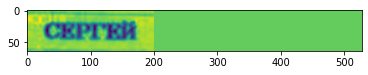

1/1 [==============================] - 0s 22ms/step


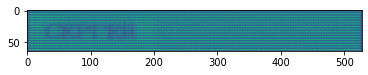

FileNotFoundError: ignored

In [ ]:
from PIL import Image
for i in range(15):
  image=Image.open("Pics/first_name"+str(i)+".jpeg")
  pic2=ChangeSize(image)
  plt.imshow(np.array(pic2))
  plt.show()
  prd=AEC_Model.predict(pic2[np.newaxis,:,:,np.newaxis])
  plt.imshow(prd[0,:,:,0])
  plt.show()
